<a href="https://colab.research.google.com/github/sharanabasavaJNV/Convolutional-neural-network/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload() 

Saving waste-classification-data.zip to waste-classification-data.zip


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d techsash/waste-classification-data

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
from zipfile import ZipFile
file_name="archieve.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.losses import categorical_crossentropy
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

from PIL import Image

In [ ]:
train_path = '/content/DATASET/TRAIN'
test_path = '/content/DATASET/TEST'
IMG_BREDTH = 30
IMG_HEIGHT = 60
num_classes = 2

In [ ]:
train_batch = ImageDataGenerator(featurewise_center=False,
                                 samplewise_center=False, 
                                 featurewise_std_normalization=False, 
                                 samplewise_std_normalization=False, 
                                 zca_whitening=False, 
                                 rotation_range=45, 
                                 width_shift_range=0.2, 
                                 height_shift_range=0.2, 
                                 horizontal_flip=True, 
                                 vertical_flip=False).flow_from_directory(train_path, 
                                                                          target_size=(IMG_HEIGHT, IMG_BREDTH), 
                                                                          classes=['O', 'R'], 
                                                                          batch_size=100)

test_batch = ImageDataGenerator().flow_from_directory(test_path, 
                                                      target_size=(IMG_HEIGHT, IMG_BREDTH), 
                                                      classes=['O', 'R'], 
                                                      batch_size=100)

Found 10 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [ ]:
def cnn_model():
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(IMG_HEIGHT,IMG_BREDTH,3)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Dropout(0.25))
    
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))
              
    model.summary()
              
    return model

def use_model(path):

    model = load_model('best_waste_classifier.h5')
    pic = plt.imread(path)
    pic = cv2.resize(pic, (IMG_BREDTH, IMG_HEIGHT))
    pic = np.expand_dims(pic, axis=0)
    classes = model.predict_classes(pic)
    model = load_model('best_waste_classifier.h5')
    pic1 = plt.imread(path)
    pic = Image.open(path).resize((IMG_BREDTH, IMG_HEIGHT))
    plt.imshow(pic1)
    if model.predict_classes(np.expand_dims(pic, axis=0)) == 0:
         classes = 'ORGANIC'
    elif model.predict_classes(np.expand_dims(pic, axis=0)) == 1:
         classes = 'RECYCLABLE'
    return classes

In [ ]:
model = cnn_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 28, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 28, 13, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 11, 64)        18496     
                                                        

In [ ]:
checkpoint = ModelCheckpoint('best_waste_classifier.h5', 
                             monitor='val_loss', 
                             verbose=0, 
                             save_best_only=True, 
                             mode='auto')

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1.0e-4), metrics=['accuracy'])

NameError: ignored

In [ ]:
model = model.fit_generator(train_batch,  
                            validation_data=test_batch,  
                            epochs=10, 
                            verbose=1, 
                            callbacks=[checkpoint])

RECYCLABLE


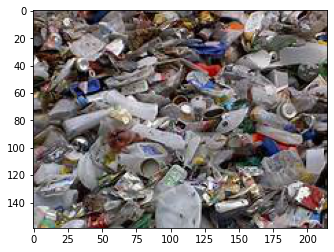

In [ ]:
print(use_model('/content/rec3.jpg'))